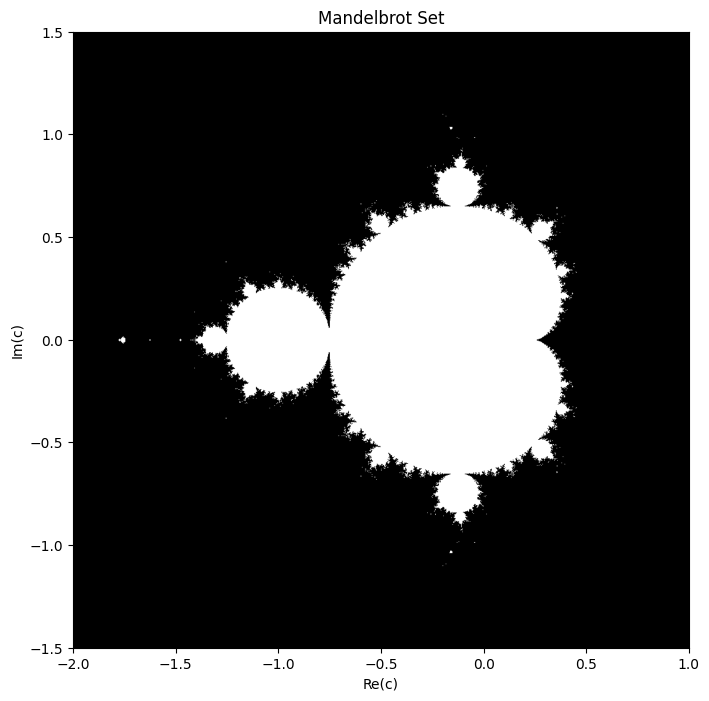

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def compute_mandelbrot(real_min, real_max, imag_min, imag_max, width, height, max_iter, threshold):

    # Create the grid of complex numbers, use j to specify the number of points
    x, y = np.mgrid[real_min:real_max:width*1j, imag_min:imag_max:height*1j]
    c = x + 1j*y
    # Initializes z to zero 
    z = np.zeros_like(c)
    
    # Create a boolean mask for the set, assumes all points are in.
    mandelbrot_set = np.ones(c.shape, dtype=bool)
    
    for i in range(max_iter):
        # Applys z_n+1 = z_n^2 + c, we only update points that haven't diverged
        mask = mandelbrot_set
        z[mask] = z[mask]**2 + c[mask]
        
        # Check which points diverged
        # use abs() to calculate the magnitude 
        diverged = np.abs(z) > threshold
        
        # Remove diverged points from the set
        mandelbrot_set[diverged] = False
            
    return mandelbrot_set


if __name__ == "__main__":
    
    #Parameters
    REAL_RANGE = [-2, 1]     
    IMAG_RANGE = [-1.5, 1.5]  
    MAX_ITER = 50 
    ESCAPE_THRESHOLD = 2 
    WIDTH, HEIGHT = 1000, 1000

    fractal_mask = compute_mandelbrot(
        REAL_RANGE[0], REAL_RANGE[1],
        IMAG_RANGE[0], IMAG_RANGE[1],
        WIDTH, HEIGHT,
        MAX_ITER, ESCAPE_THRESHOLD
    )
    
    
    # Plot the fractal
    plt.figure(figsize=(8, 8))
    plt.imshow(
        fractal_mask.T, 
        extent=[REAL_RANGE[0], REAL_RANGE[1], IMAG_RANGE[0], IMAG_RANGE[1]],
        origin="lower"
    )
    # Save the file and show the plot    
    plt.title("Mandelbrot Set")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.gray ()
    plt.savefig("mandelbrot.png")
    plt.show()